<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment Analysis using Machine Learning

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle

In [ ]:
# !cp kaggle.json ~/.kaggle

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list

In [ ]:
# !mkdir -p data
# !wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/training.1600000.processed.noemoticon.csv.zip -P data
# !unzip -n -d data data/training.1600000.processed.noemoticon.csv.zip

In [ ]:
dataset = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding="latin", names=["sentiment", "id", "date", "query", "user_id", "text"])
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
dataset.keys()

Index(['sentiment', 'id', 'date', 'query', 'user_id', 'text'], dtype='object')

The dataset contains the labels as `positive = 4` and `negative = 0`. Therefore, we convert it to `positive = 1` and `negative = 0` for our binary classification.

In [ ]:
dataset["sentiment"] = dataset["sentiment"].replace(4, 1)

### Analyzing the data

We want to make sure that during the training phase equal amount of both negative and positive tweets are supplied to be fair. We use `searborn` library for that purpose.

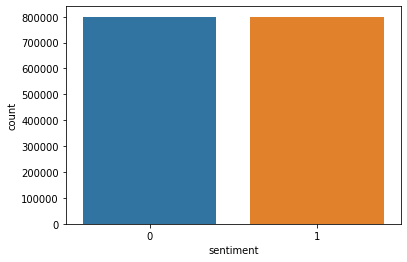

In [ ]:
sns.countplot(x="sentiment", data=dataset)

### Cleaning the Dataset

We want to make sure that the data supplied is in a good shape. First of all, we need to eliminate the null values. Let's count the number of null values.

In [ ]:
np.sum(dataset.isnull().any(axis=1))

0

😁 No data herein is `null`.

Now let's create strings of positive and negative values to analyze the words.

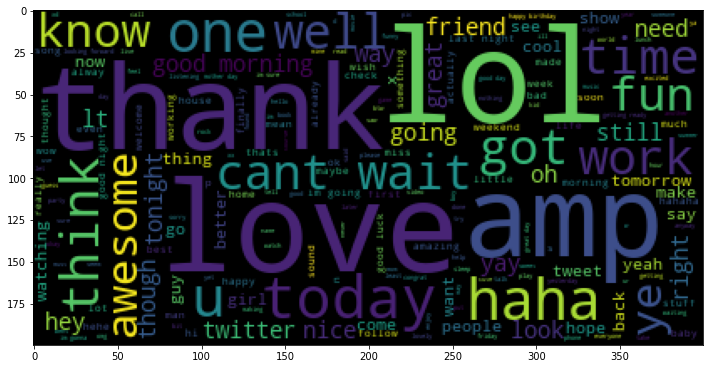

In [ ]:
positive_tweets = dataset[dataset["sentiment"] == 1]["text"].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(positive_tweets_string))

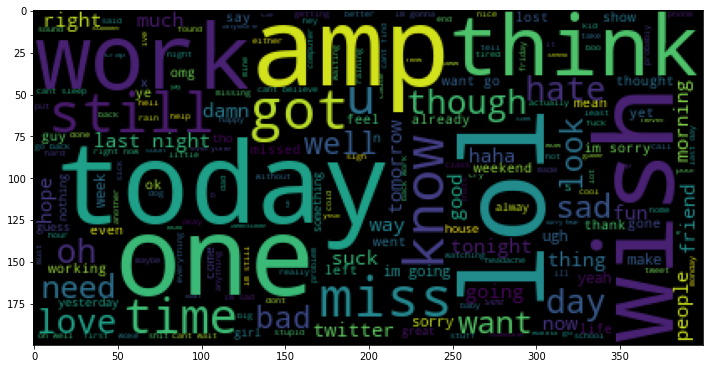

In [ ]:
negative_tweets = dataset[dataset["sentiment"] == 0]["text"].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(negative_tweets_string))

**What are `stopwords`?**

There are some commonly used words in the sentences such as conjunctions, prepositions, etc. which may be so common and unwanted so that we don't them to contribute as some important features and therefore we count only those words that are less frequent and convey more meaning. These words are known as stopwords in machine learning terms.

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Stopwords in English
stops = set(stopwords.words("english"))

We need to convert the text into lower case so that they can be effectively compared.

In [ ]:
dataset["text"] = dataset["text"].str.lower()
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Procedure to remove the stopwords from a string
def cleaner(text):
    return " ".join([word for word in str(text).split() if word not in stops])

Now we apply the procedure to each row of the dataset to clean the text and remove the stopwords from all the tweets.

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: cleaner(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update facebook texting it... migh...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan dived many times ball. managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, behaving all. i'm mad. he..."


Similarly, we also need to remove the `punctuations` for better feature extraction.

In [ ]:
puncs = string.punctuation

In [ ]:
# Procedure to clean the punctuations
def punc_cleaner(text):
    translator = str.maketrans("", "", puncs)
    return text.translate(translator)

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: punc_cleaner(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


Now we need to remove the repeating characters.

In [ ]:
def repeat_cleaner(text):
    return re.sub(r'(.)1+', '1', text)

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: repeat_cleaner(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom21zl awww thats bumm...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


Now we need to remove the URLs.

In [ ]:
def URL_cleaner(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', text)

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: URL_cleaner(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom21zl a s bummer shou...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


Now we need to clean the numbers.

In [ ]:
def number_cleaner(text):
    return re.sub('[0-9]+', '', text)

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: number_cleaner(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomzl a s bummer should...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save r...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


Now, we need to `tokenize` the strings.

In [ ]:
dataset2 = dataset.copy()
dataset2.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomzl a s bummer should...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save r...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer('\w+')
dataset["text"] = dataset["text"].apply(tokenizer.tokenize)
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[switchfoot, httptwitpiccomzl, a, s, bummer, s..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, cant, update, facebook, texting, it, m..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[kenichan, dived, many, times, ball, managed, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[nationwideclass, no, behaving, all, im, mad, ..."


Now we need to perform `Stemming`.

In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

In [ ]:
# dataset["text"] = dataset["text"].apply(lambda x: stemming(x))
# dataset.head()

Now we need to `Lemmatize` the text.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lemmatizer = nltk.WordNetLemmatizer()

In [ ]:
def lemmatizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: lemmatizing(x))
dataset["text"].head()

0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, time, ball, managed, s...
3               [whole, body, feel, itchy, like, fire]
4    [nationwideclass, no, behaving, all, im, mad, ...
Name: text, dtype: object

### Feature Extraction

Now we need to perform `Count Vectorization`. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dataset3 = dataset.copy()

In [ ]:
dataset = dataset3.copy()

In [ ]:
dataset["text"] = dataset["text"].apply(lambda x: " ".join(x))
dataset.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomzl a s bummer shoulda...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many time ball managed save res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here ca...


In [ ]:
df = dataset.sample(frac=1)[:5000]

In [ ]:
vec = CountVectorizer()
vec.fit(df["text"])

CountVectorizer()

In [ ]:
X = vec.transform(df["text"]).toarray()
y = df["sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model1 = MultinomialNB()
model2 = DecisionTreeClassifier()

In [ ]:
model1.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [ ]:
precision_score(y_test, pred1), accuracy_score(y_test, pred1), recall_score(y_test, pred1), f1_score(y_test, pred1)

(0.7379310344827587, 0.708, 0.6432865731462926, 0.6873661670235546)

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred2 = model2.predict(X_test)

In [ ]:
precision_score(y_test, pred2), accuracy_score(y_test, pred2), recall_score(y_test, pred2), f1_score(y_test, pred2)

(0.6629213483146067, 0.648, 0.5935613682092555, 0.6263269639065818)